In [1]:
import pickle
from misc import *
import SYCLOP_env as syc
from RL_brain_b import DeepQNetwork


In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
import cv2

from mnist import MNIST

mnist = MNIST('/home/bnapp/datasets/mnist/')
images, labels = mnist.load_training()

some_mnist =[ cv2.resize(1.+np.reshape(uu,[28,28]), dsize=(256, 256), interpolation=cv2.INTER_AREA) for uu in images[:20]]           
some_mnistSM =[ cv2.resize(1.+np.reshape(uu,[28,28]), dsize=(256, 256)) for uu in images[:20]]           
some_mnist0p5 =[ 0.5*cv2.resize(1.+np.reshape(uu,[28,28]), dsize=(256, 256), interpolation=cv2.INTER_AREA) for uu in images[:20]]    
some_mnistSM0p5 =[ 0.5*cv2.resize(1.+np.reshape(uu,[28,28]), dsize=(256, 256)) for uu in images[:20]]           


In [5]:
    hp = HP()
    hp.mem_depth=1
    hp.logmode = False
#     recorder = Recorder(n=4)
#     images = read_images_from_path('../video_datasets/liron_images/*.jpg')
#     images = [np.mean(1.0*uu, axis=2) for uu in images]
#     images = [cv2.resize(uu, dsize=(256, 256-64), interpolation=cv2.INTER_AREA) for uu in images]
    images = read_images_from_path('/home/bnapp/arivkindNet/video_datasets/stills_from_videos/some100img_from20bn/*',max_image=10)
#     images = some_mnistSM# +some_mnistSM0p5 # + some_mnist0p5 +some_mnistSM 
#     images = [np.sum(1.0*uu, axis=2) for uu in images]
#     images = [cv2.resize(uu, dsize=(256, 256-64), interpolation=cv2.INTER_AREA) for uu in images]
#     import pickle
#     with open('../video_datasets/liron_images/shuffled_images.pkl','rb') as f:
#         uu = pickle.load(f)
#     images +=uu
    scene = syc.Scene(frame_list=images)
    sensor = syc.Sensor()
    agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy])

    reward = syc.Rewards()
    observation_size = 256*4
    RL = DeepQNetwork(len(agent.hp.action_space), observation_size*hp.mem_depth,#sensor.frame_size+2,
                      reward_decay=0.99,
                      e_greedy=0.99,
                      e_greedy0=0.99,
                      replace_target_iter=10,
                      memory_size=100000,
                      e_greedy_increment=0.0001,
                      learning_rate=0.0025,
                      double_q=False,
                      dqn_mode=True,
                      state_table=np.zeros([1,observation_size*hp.mem_depth])
                      )




In [6]:
# RL.dqn.load_nwk_param('saed_runs/run_syclop_lirondb.py_noname_1557658952/best_liron.nwk')
# RL.dqn.load_nwk_param('saved_runs/old_flat_saves/liron_random_ic05.nwk')
# RL.dqn.load_nwk_param('saved_runs/run_syclop_generic1.py_noname_1559252614/tempX_1.nwk') #10M run
# RL.dqn.load_nwk_param('saved_runs/run_syclop_generic1.py_noname_1559252614/best_liron.nwk') #10M run bset
RL.dqn.load_nwk_param('saved_runs/run_syclop_generic1.py_noname_1559836592/tempX_1.nwk')
# RL.dqn.load_nwk_param('saved_runs/run_syclop_generic1.py_noname_1559248534/tempX_1.nwk')
# RL.dqn.load_nwk_param('saved_runs/run_syclop_generic1.py_noname_1559122242/tempX_1.nwk')

In [7]:
save_dir='saved_runs/'
run_dirs = sorted(glob.glob(save_dir+'/*_1563708769*/'))
tosort = []
for ff,file in enumerate(run_dirs):
    try:
        with open(file+'/hp.pkl','rb') as f:
            hp = pickle.load(f)
        if 'reward' in hp.__dict__.keys():
    #         print(file)
            print(ff,'---',hp.reward.reward_types,'---',hp.reward.relative_weights,hp.fading_mem)
        tosort.append((hp.reward.relative_weights[-1],hp.fading_mem,ff))
    except:
        pass

0 --- ['central_rms_intensity', 'speed'] --- [1.0, -10.0] 0.9
1 --- ['central_rms_intensity', 'speed'] --- [1.0, -10.0] 0.1
2 --- ['central_rms_intensity', 'speed'] --- [1.0, -10.0] 0.0
3 --- ['central_rms_intensity', 'speed'] --- [1.0, -0.0] 0.5
4 --- ['central_rms_intensity', 'speed'] --- [1.0, -5.0] 0.3
5 --- ['central_rms_intensity', 'speed'] --- [1.0, -12.0] 0.3
6 --- ['central_rms_intensity', 'speed'] --- [1.0, -10.0] 0.5
7 --- ['central_rms_intensity', 'speed'] --- [1.0, -10.0] 0.7
8 --- ['central_rms_intensity', 'speed'] --- [1.0, -5.0] 0.0
9 --- ['central_rms_intensity', 'speed'] --- [1.0, -0.0] 0.9
10 --- ['central_rms_intensity', 'speed'] --- [1.0, -10.0] 0.3
11 --- ['central_rms_intensity', 'speed'] --- [1.0, -12.0] 0.0
12 --- ['central_rms_intensity', 'speed'] --- [1.0, -0.0] 0.3
13 --- ['central_rms_intensity', 'speed'] --- [1.0, -5.0] 0.9
14 --- ['central_rms_intensity', 'speed'] --- [1.0, -5.0] 0.1
15 --- ['central_rms_intensity', 'speed'] --- [1.0, -0.0] 0.7
16 --- ['c

In [8]:
nets_to_eval=[uu[2] for uu in sorted(tosort)]

In [9]:

def local_observer(sensor,agent):
    if hp.logmode:
        normfactor=1.0
    else:
        normfactor = 1.0/256.0
    # return np.concatenate([1.0/65000*(sensor.dvs_view.reshape([-1]))])
    # return 1.0/65000*np.concatenate([relu_up_and_down(sensor.central_dvs_view),
    #        relu_up_and_down(sensor.dvs_view, downsample_fun=lambda x: cv2.resize(x, dsize=(16, 16), interpolation=cv2.INTER_AREA))])
    return normfactor*np.concatenate([relu_up_and_down(sensor.central_dvs_view),
            relu_up_and_down(cv2.resize(1.0*sensor.dvs_view, dsize=(16, 16), interpolation=cv2.INTER_AREA))])

observation = np.random.uniform(0,1,size=[hp.mem_depth, observation_size])
# hp.fading_mem = 0.5

In [10]:
recorders=[]
for ff in nets_to_eval:
    for result_type in ['best_liron.nwk']:
        RL.dqn.load_nwk_param(run_dirs[ff]+'/'+ result_type) #tempX_1.nwk')
        with open(run_dirs[ff]+'/hp.pkl','rb') as f:
                  this_hp = pickle.load(f)
                  hp.fading_mem = this_hp.fading_mem +0.0 #to avoid assignment by address
        for image_num,image in enumerate(images):
            recorder = Recorder(n=4)
            step = 0
            episode = 0
            observation = np.random.uniform(0,1,size=[hp.mem_depth, observation_size])
            observation_ = np.random.uniform(0,1,size=[hp.mem_depth, observation_size])
            scene.current_frame = image_num
            scene.image = scene.frame_list[scene.current_frame]

            agent.reset()
            agent.q_ana[1]=256./2.-32
            agent.q_ana[0]=256./2-32
            agent.q = np.int32(np.floor(agent.q_ana))

            sensor.reset()
            sensor.update(scene, agent)
            sensor.update(scene, agent)
            for step_prime in range(1000):
                action = RL.choose_action(observation.reshape([-1]))
                reward.update_rewards(sensor = sensor, agent = agent)
                recorder.record([agent.q_ana[0],agent.q_ana[1],reward.reward,RL.epsilon])
                agent.act(action)
                sensor.update(scene,agent)
                observation *= hp.fading_mem
                observation += local_observer(sensor, agent)  # todo: generalize
                if step%1000 ==0:
                    print(episode,step)
        #                 print('frame:', scene.current_frame)
                step += 1
            recorders.append(recorder)



0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


for image,recorder in zip(images,recorders):
    plt.figure()
    plt.imshow(image,vmax=256,vmin=0)
    plt.plot(32+np.array(recorder.records[0]),image.shape[0]-32-np.array(recorder.records[1]),'r-')
    plt.plot(32+np.array(recorder.records[0])[0],image.shape[0]-32-np.array(recorder.records[1])[0],'o')
    plt.plot(32+np.array(recorder.records[0])[-1],image.shape[0]-32-np.array(recorder.records[1])[-1],'*')

# plt.title('10 syclop trajectories 10,000 timesteps each')

In [11]:
# RL.dqn.save_nwk_param('liron_encircle.nwk')

In [12]:
# import pickle
# with open('../video_datasets/liron_images/shuffled_images.pkl','rb') as f:
#     uu = pickle.load(f)

<IPython.core.display.Javascript object>


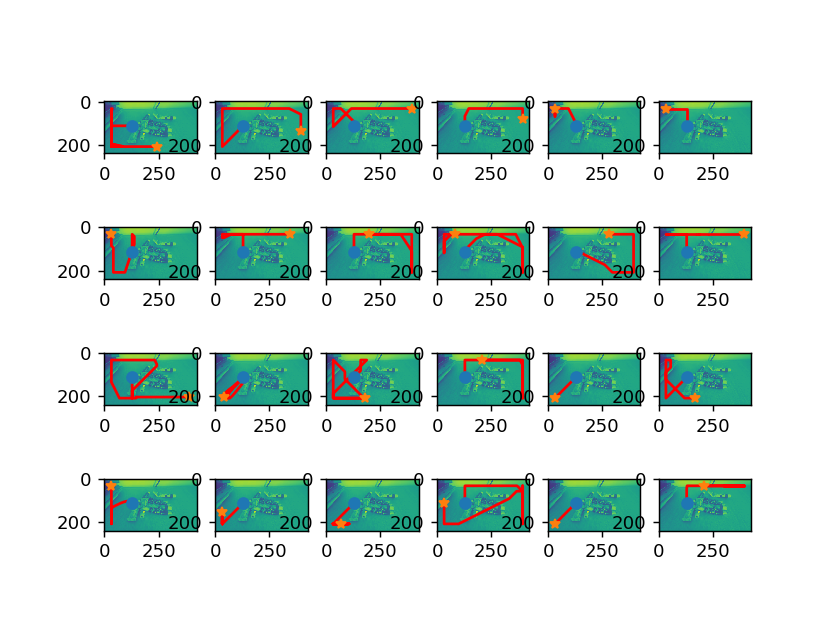

<IPython.core.display.Javascript object>


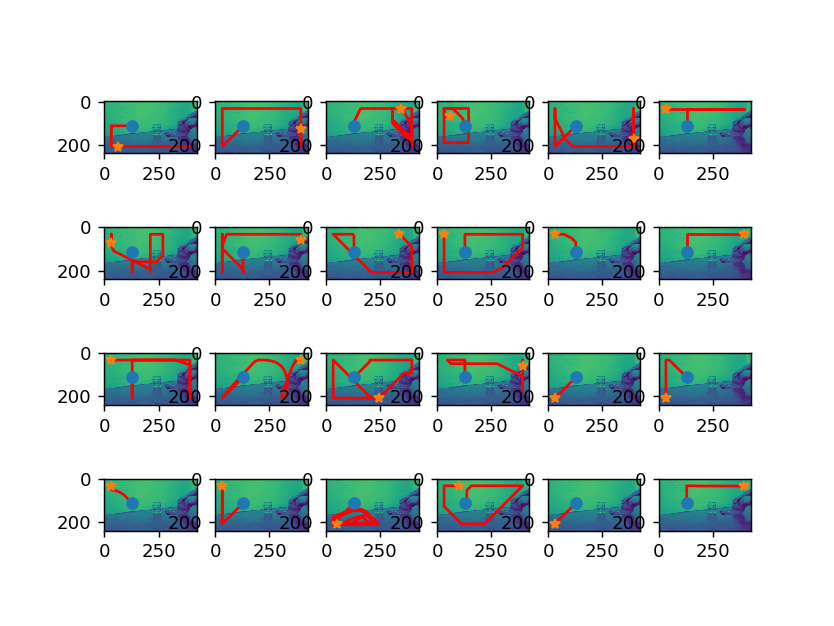

<IPython.core.display.Javascript object>


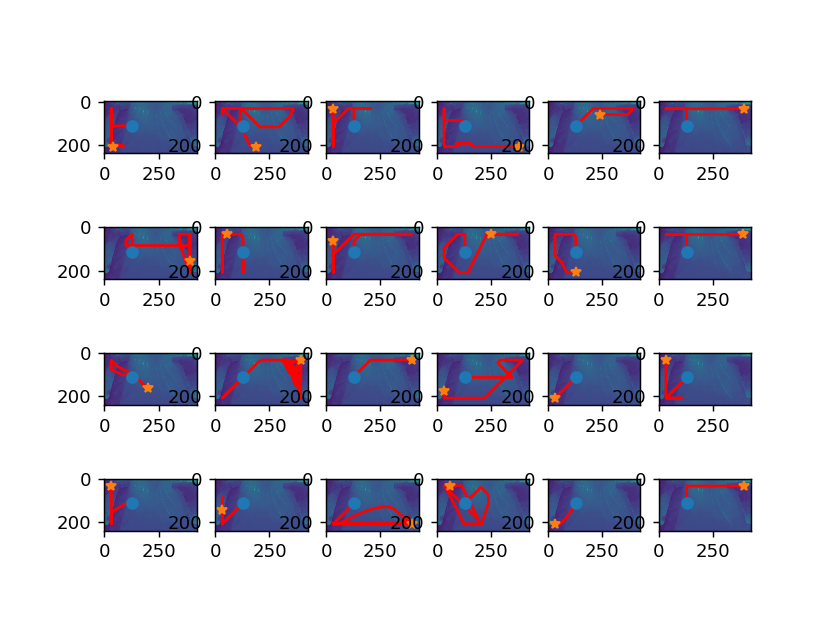

<IPython.core.display.Javascript object>


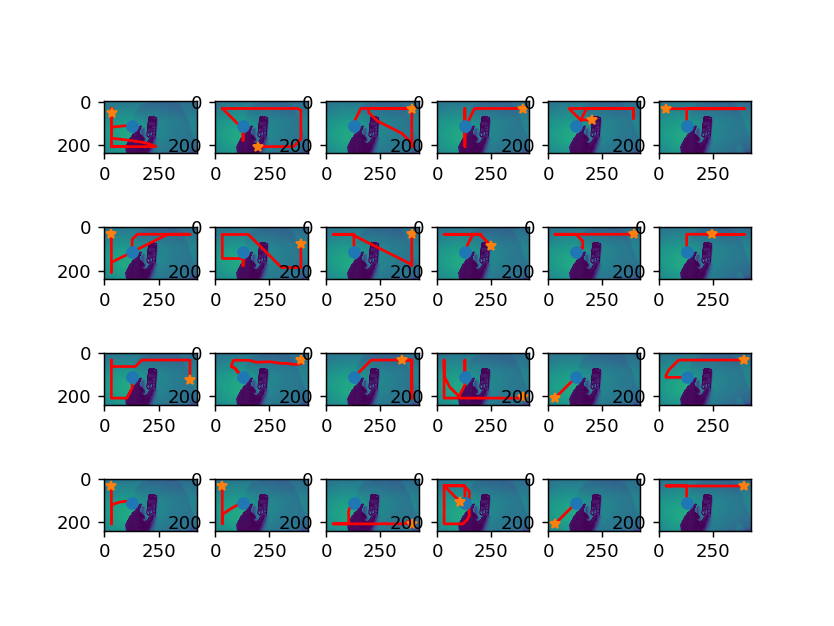

<IPython.core.display.Javascript object>


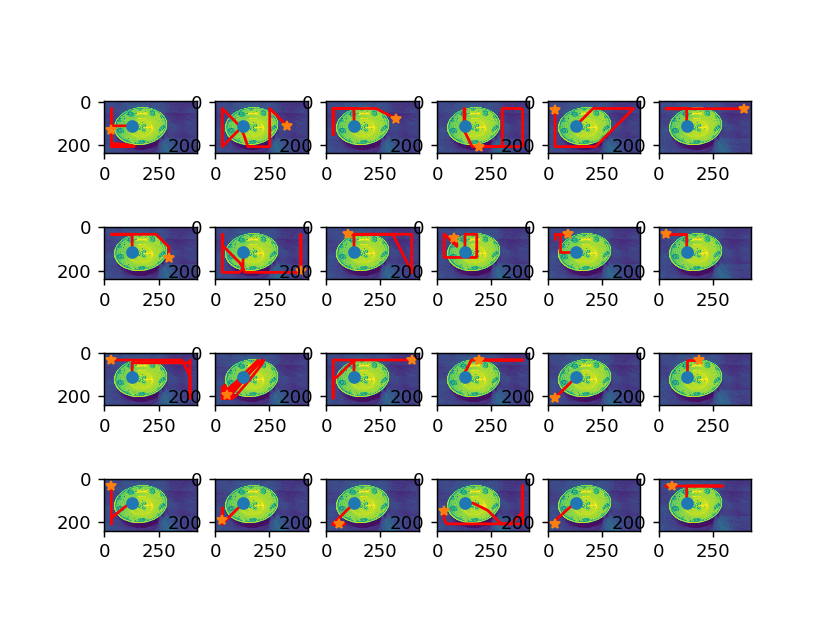

<IPython.core.display.Javascript object>


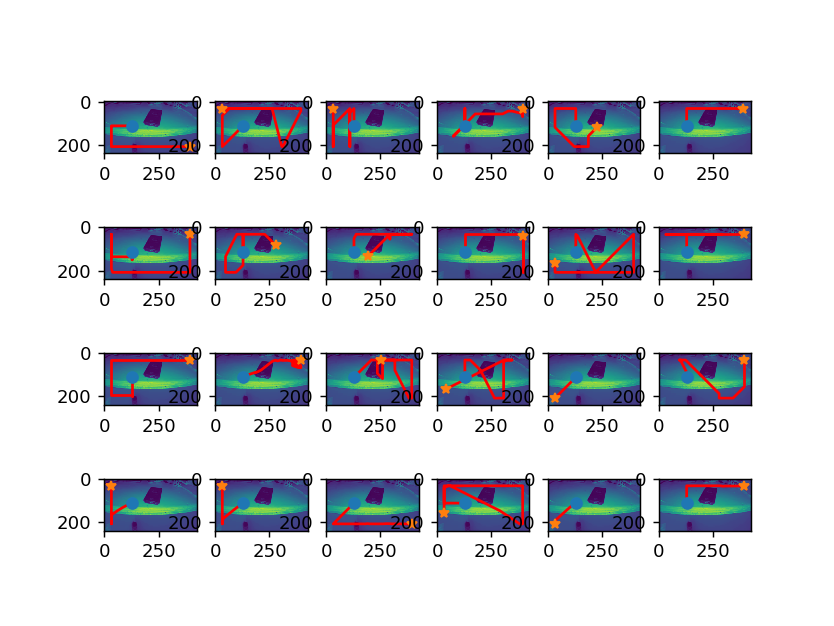

<IPython.core.display.Javascript object>


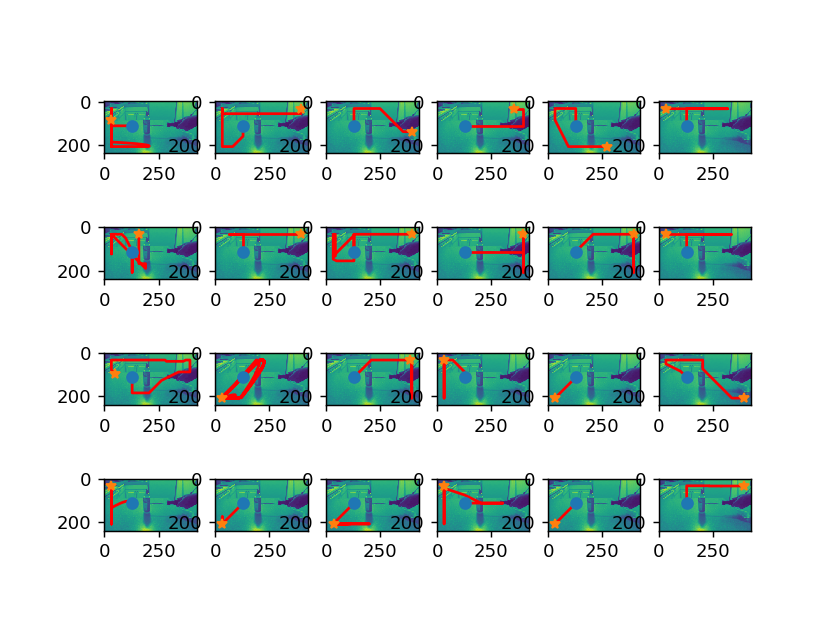

<IPython.core.display.Javascript object>


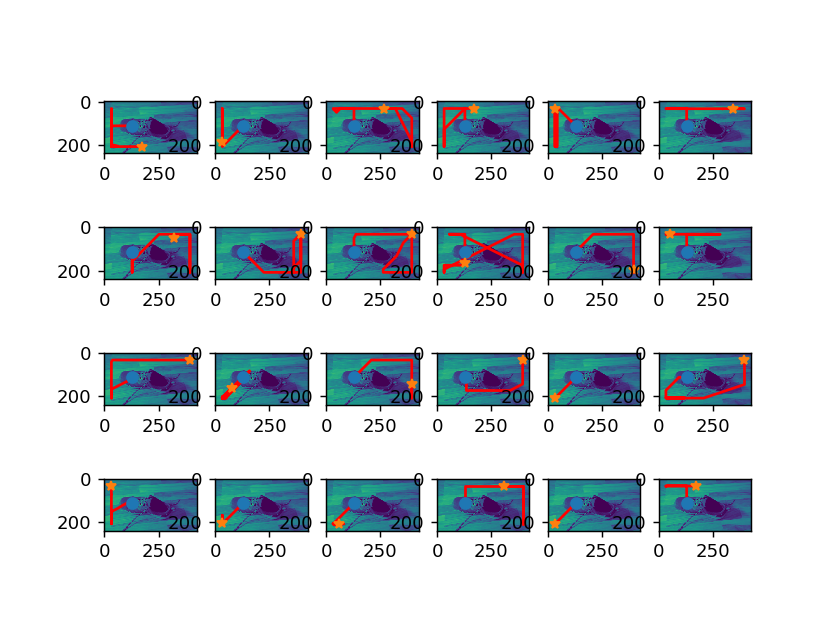

<IPython.core.display.Javascript object>


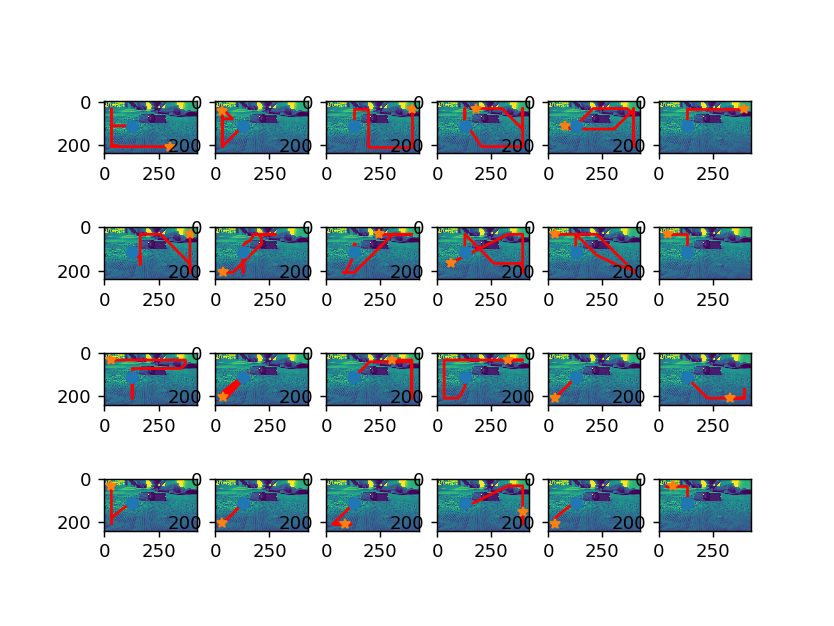

<IPython.core.display.Javascript object>


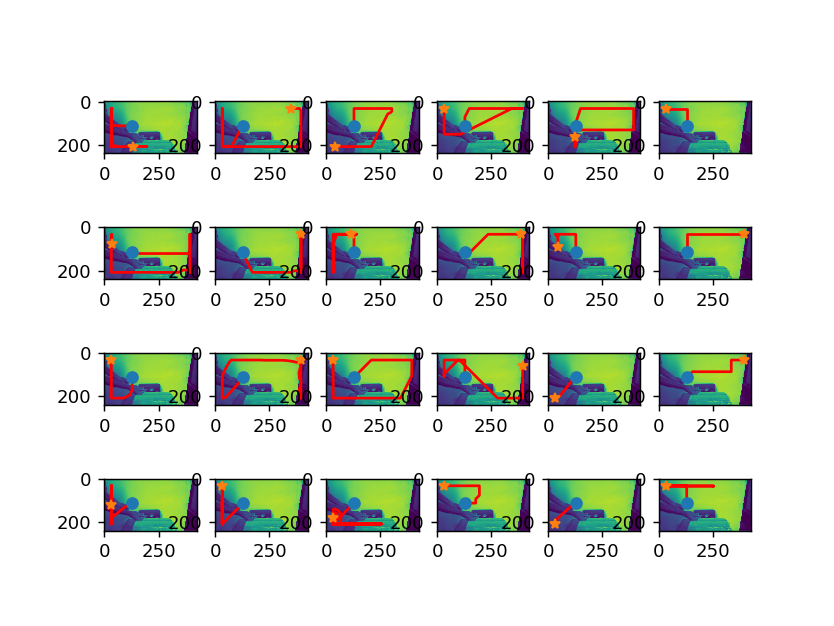

In [13]:
mm=len(recorders)//24
for imag_num in range(mm):
    plt.figure()
    for qq in range(24):
        recorder = recorders[mm*qq+imag_num]
        image = images[imag_num]
        plt.subplot(4,6,qq+1)
        plt.imshow(image,vmax=256,vmin=0)
        plt.plot(32+np.array(recorder.records[0]),image.shape[0]-32-np.array(recorder.records[1]),'r-')
        plt.plot(32+np.array(recorder.records[0])[0],image.shape[0]-32-np.array(recorder.records[1])[0],'o')
        plt.plot(32+np.array(recorder.records[0])[-1],image.shape[0]-32-np.array(recorder.records[1])[-1],'*')

In [14]:
sorted([(1,2),(6,1),(-1,30),(6,-0.5),(1,-100)])

[(-1, 30), (1, -100), (1, 2), (6, -0.5), (6, 1)]

In [15]:
for image in images:
    print(np.min(image),np.max(image))

36 253
4 203
10 166
0 243
4 255
0 242
10 252
0 227
0 255
0 255


In [16]:
this_hp.description

'some images from something-something video dataset, penalty for speed, flexible fading const'